# Travel Package Purchase Prediction

Anish Indukur

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
import math
import pipe

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',200)

import missingno as msno

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

ModuleNotFoundError: No module named 'xgboost'

In [4]:
dataset = '/Users/anish/Desktop/School/AIML/Datasets/Tourism.csv'
data = pd.read_csv(dataset)

Data Dictionary: 

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


Objectives:

* Predict customers that will purchase the newly introduced travel package
* Generate business reccomandations that can help the company target customers more effectively

In [5]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000,Self Enquiry,3,6.000,Salaried,Female,3,3.000,Deluxe,3.000,Single,1.000,1,2,1,0.000,Manager,20993.000
1,200001,0,49.000,Company Invited,1,14.000,Salaried,Male,3,4.000,Deluxe,4.000,Divorced,2.000,0,3,1,2.000,Manager,20130.000
2,200002,1,37.000,Self Enquiry,1,8.000,Free Lancer,Male,3,4.000,Basic,3.000,Single,7.000,1,3,0,0.000,Executive,17090.000
3,200003,0,33.000,Company Invited,1,9.000,Salaried,Female,2,3.000,Basic,3.000,Divorced,2.000,1,5,1,1.000,Executive,17909.000
4,200004,0,NaN,Self Enquiry,1,8.000,Small Business,Male,2,3.000,Basic,4.000,Divorced,1.000,0,5,1,0.000,Executive,18468.000


In [6]:
data.shape

(4888, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

A few of the object datatype columns can be changed to categories.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.000,202443.500,1411.188,200000.000,201221.750,202443.500,203665.250,204887.000
ProdTaken,4888.000,0.188,0.391,0.000,0.000,0.000,0.000,1.000
Age,4662.000,37.622,9.316,18.000,31.000,36.000,44.000,61.000
CityTier,4888.000,1.654,0.917,1.000,1.000,1.000,3.000,3.000
DurationOfPitch,4637.000,15.491,8.520,5.000,9.000,13.000,20.000,127.000
NumberOfPersonVisiting,4888.000,2.905,0.725,1.000,2.000,3.000,3.000,5.000
NumberOfFollowups,4843.000,3.708,1.003,1.000,3.000,4.000,4.000,6.000
PreferredPropertyStar,4862.000,3.581,0.798,3.000,3.000,3.000,4.000,5.000
NumberOfTrips,4748.000,3.237,1.849,1.000,2.000,3.000,4.000,22.000
Passport,4888.000,0.291,0.454,0.000,0.000,0.000,1.000,1.000


<AxesSubplot:>

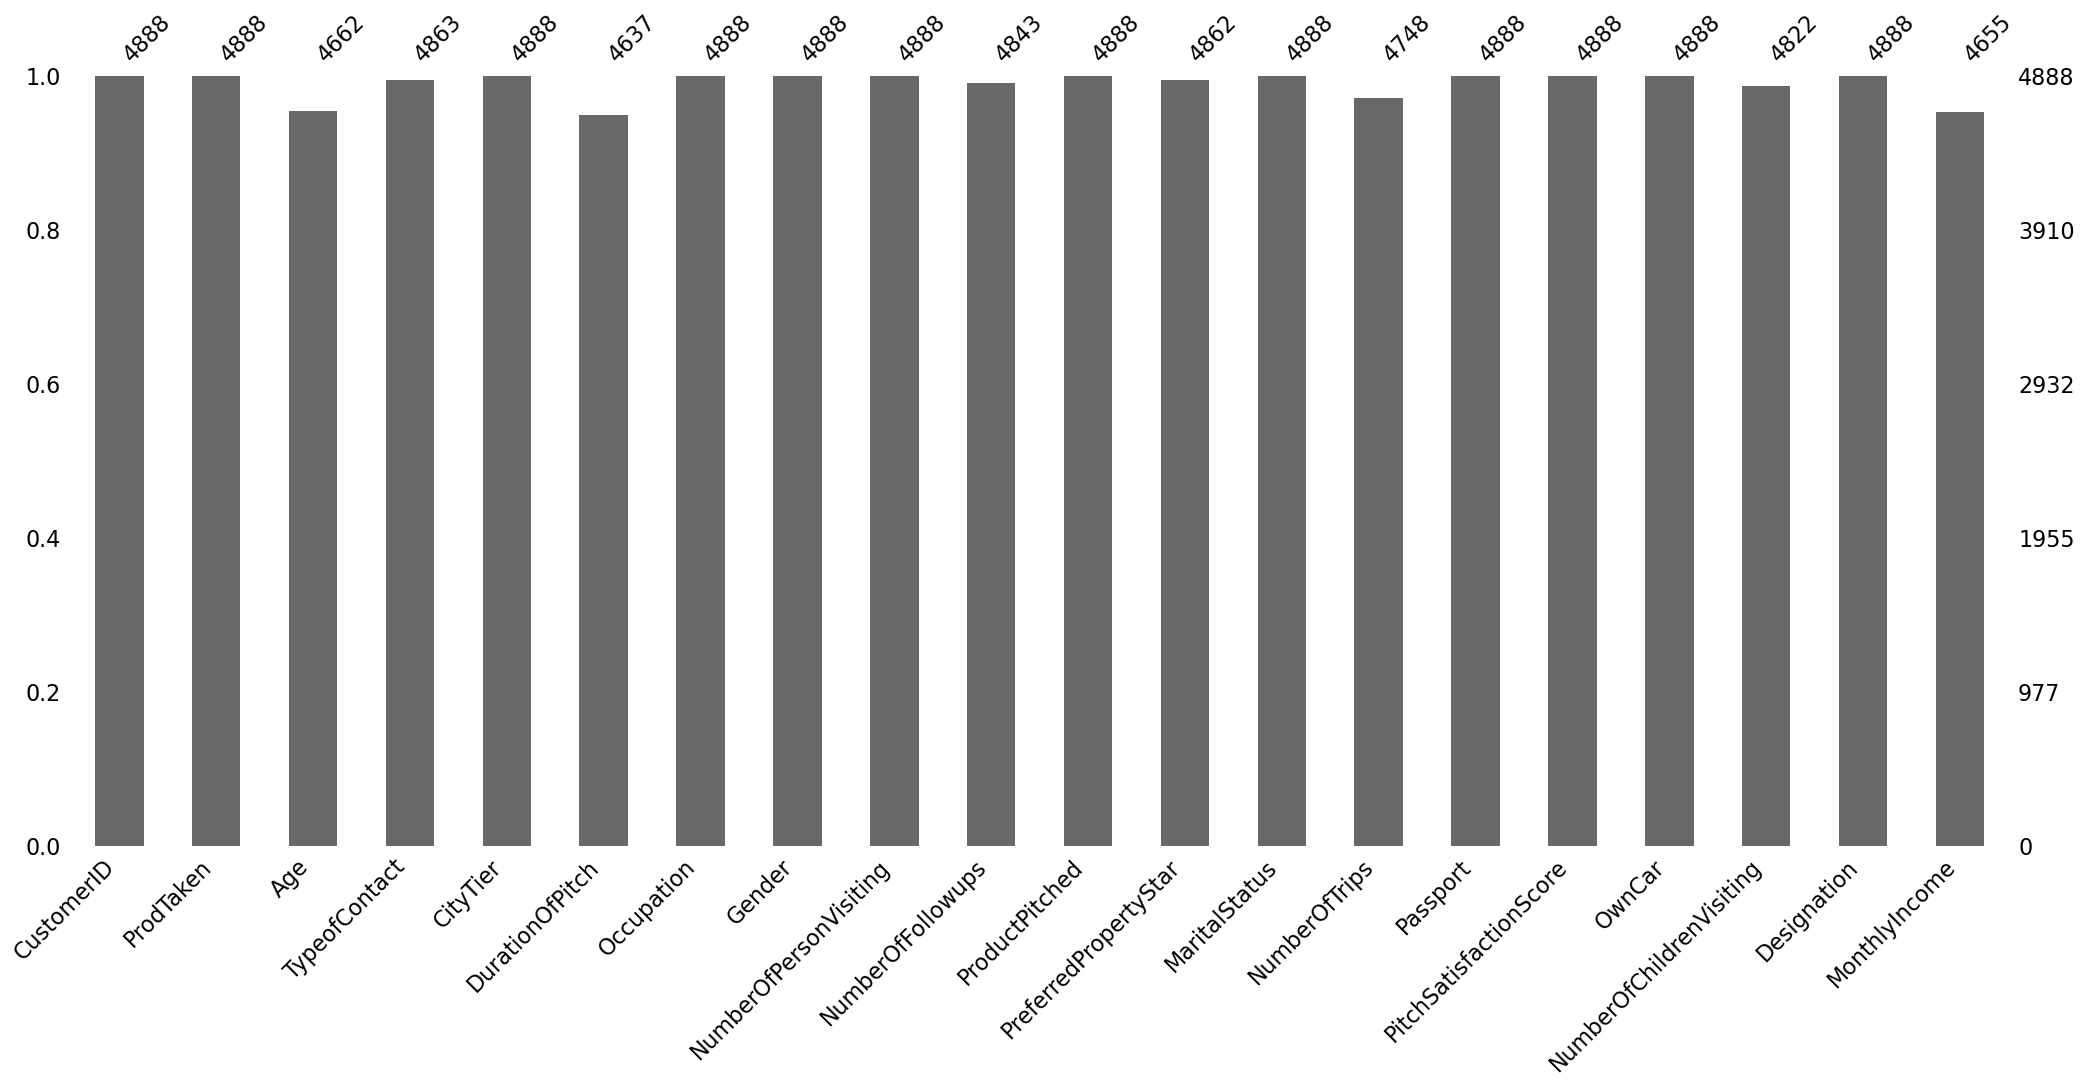

In [9]:
msno.bar(data)

There's quite a few missing data points that we'll need to handle

<AxesSubplot:>

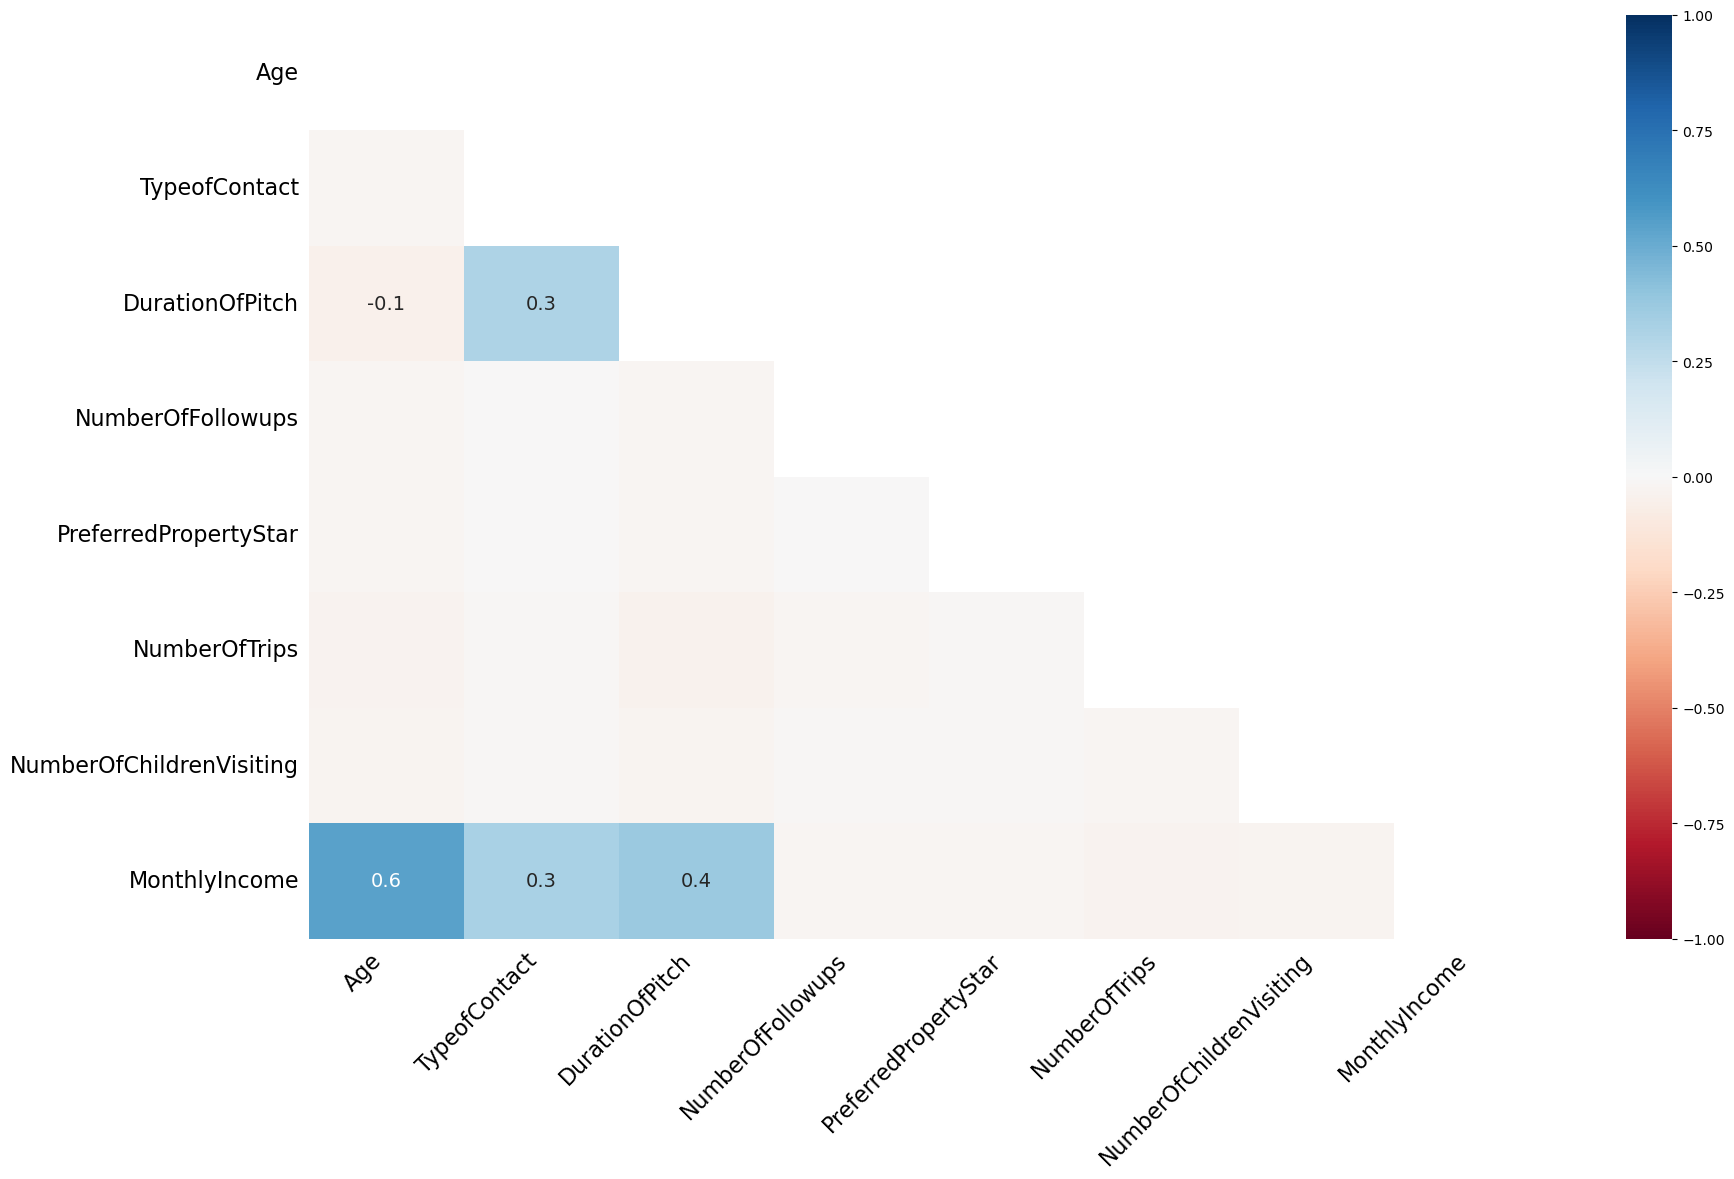

In [12]:
msno.heatmap(data)

If there is data missing in MonthlyIncome, it is more likely that the same row is also missing Age, TypeofContact, and DurationofPitch. It is possible this is because the Age and MonthlyIncome and collected during the pitch.

## Data Pre-Processing

In [255]:
catColumns = ['TypeofContact', 'Gender', 'Occupation','ProductPitched','MaritalStatus','Designation','ProdTaken','OwnCar','Passport']

for i in catColumns:
    data[i] = data[i].astype('category')
# Changing corresponding columns to category type
    
boolColumns = ['OwnCar','Passport','ProdTaken']

for i in boolColumns:
    data[i] = data[i].astype('bool')
# Changing corresponding columns to boolean values

In [256]:
data.drop('CustomerID', axis = 1, inplace = True)

In [257]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.000,37.622,9.316,18.000,31.000,36.000,44.000,61.000
CityTier,4888.000,1.654,0.917,1.000,1.000,1.000,3.000,3.000
DurationOfPitch,4637.000,15.491,8.520,5.000,9.000,13.000,20.000,127.000
NumberOfPersonVisiting,4888.000,2.905,0.725,1.000,2.000,3.000,3.000,5.000
NumberOfFollowups,4843.000,3.708,1.003,1.000,3.000,4.000,4.000,6.000
PreferredPropertyStar,4862.000,3.581,0.798,3.000,3.000,3.000,4.000,5.000
NumberOfTrips,4748.000,3.237,1.849,1.000,2.000,3.000,4.000,22.000
PitchSatisfactionScore,4888.000,3.078,1.366,1.000,2.000,3.000,4.000,5.000
NumberOfChildrenVisiting,4822.000,1.187,0.858,0.000,1.000,1.000,2.000,3.000
MonthlyIncome,4655.000,23619.853,5380.698,1000.000,20346.000,22347.000,25571.000,98678.000


In [258]:
cat_cols =  data.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------


Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
--------------------------------------------------




* We need to change 'Fe Male' to Female

In [259]:
cat_cols =  data.select_dtypes(['bool'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

False    3968
True      920
Name: ProdTaken, dtype: int64
--------------------------------------------------


False    3466
True     1422
Name: Passport, dtype: int64
--------------------------------------------------


True     3032
False    1856
Name: OwnCar, dtype: int64
--------------------------------------------------




In [260]:
data['Gender']=data['Gender'].replace('Fe Male', 'Female')

In [261]:
data.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [262]:
impute_cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips']

In [263]:
medianFiller = lambda x: x.fillna(x.median()) 
#replacing with the Median value of the attributes

data[impute_cols] = data[impute_cols].apply(medianFiller,axis=0)

In [264]:
#we will replace the missing values with median income w.r.t the customer's designation
data["MonthlyIncome"] = data.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
data["Age"] = data.groupby(['Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

In [265]:
cat_cols =  data.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')
    

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male      2916
Female    1972
Name: Gender, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------


Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
--------------------------------------------------




In [266]:
data['TypeofContact'] = data['TypeofContact'].fillna('Self Enquiry')
#Filling N/As with Self Enquiry since that seems to be the most common value
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(3)
#3 is the most common star value
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(1)
#1 is the most common number of children visiting

In [267]:
data.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

* We have successfully taken care of all of our missing values, we can now start analysis.

In [268]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888,2,False,3968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4888.000,NaN,NaN,NaN,37.430,9.150,18.000,31.000,36.000,43.000,61.000
TypeofContact,4888,2,Self Enquiry,3469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.000,NaN,NaN,NaN,1.654,0.917,1.000,1.000,1.000,3.000,3.000
DurationOfPitch,4888.000,NaN,NaN,NaN,15.363,8.316,5.000,9.000,13.000,19.000,127.000
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,2,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.000,NaN,NaN,NaN,2.905,0.725,1.000,2.000,3.000,3.000,5.000
NumberOfFollowups,4888.000,NaN,NaN,NaN,3.711,0.998,1.000,3.000,4.000,4.000,6.000
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis:

In [269]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

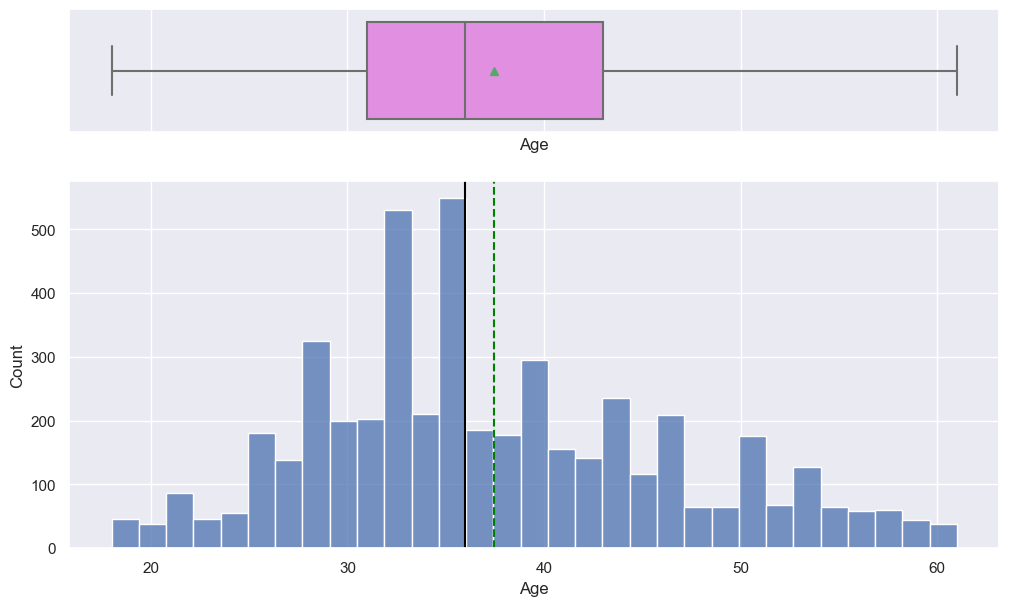

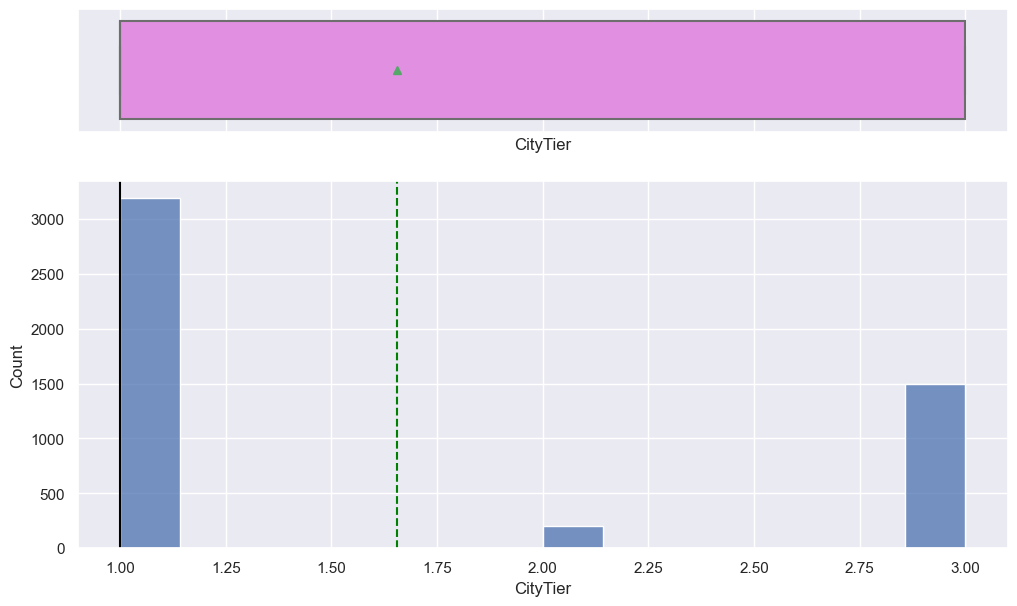

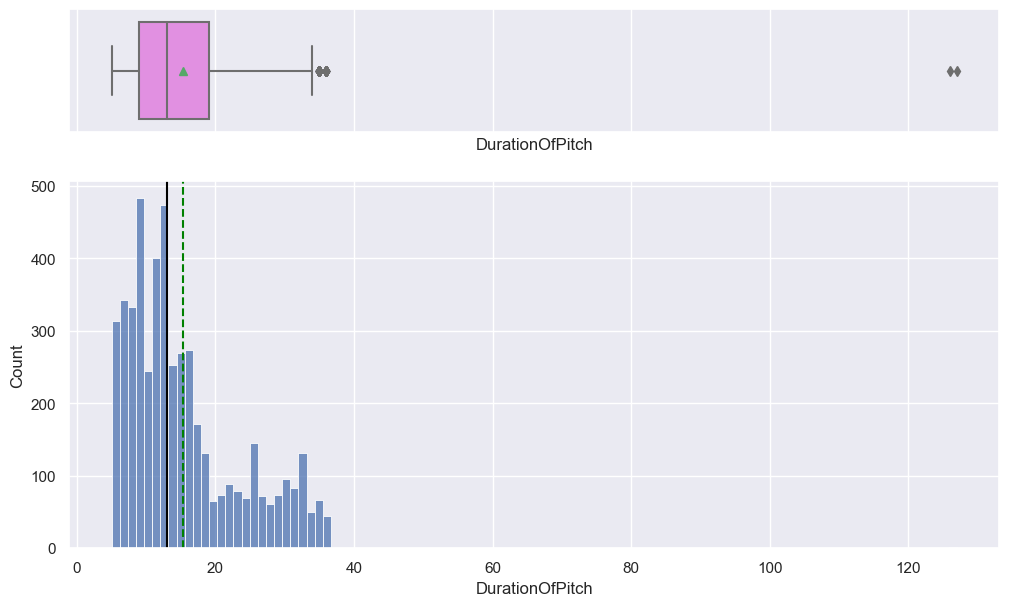

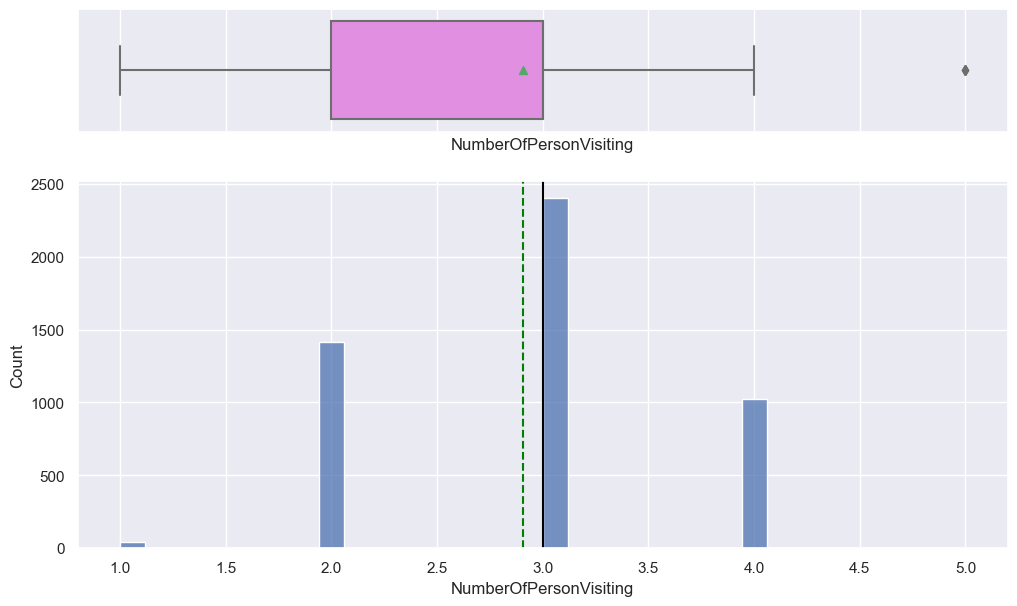

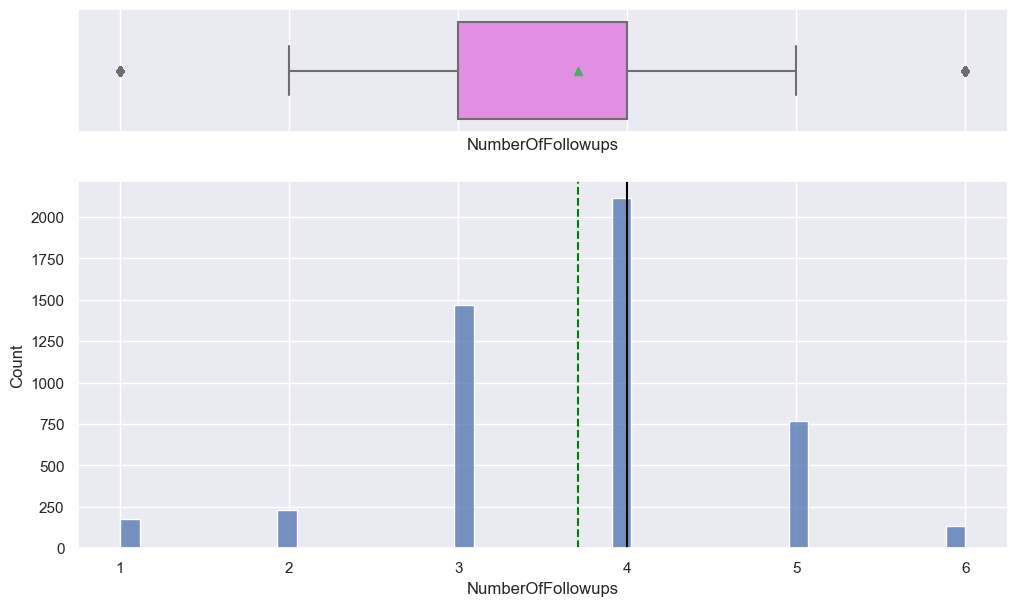

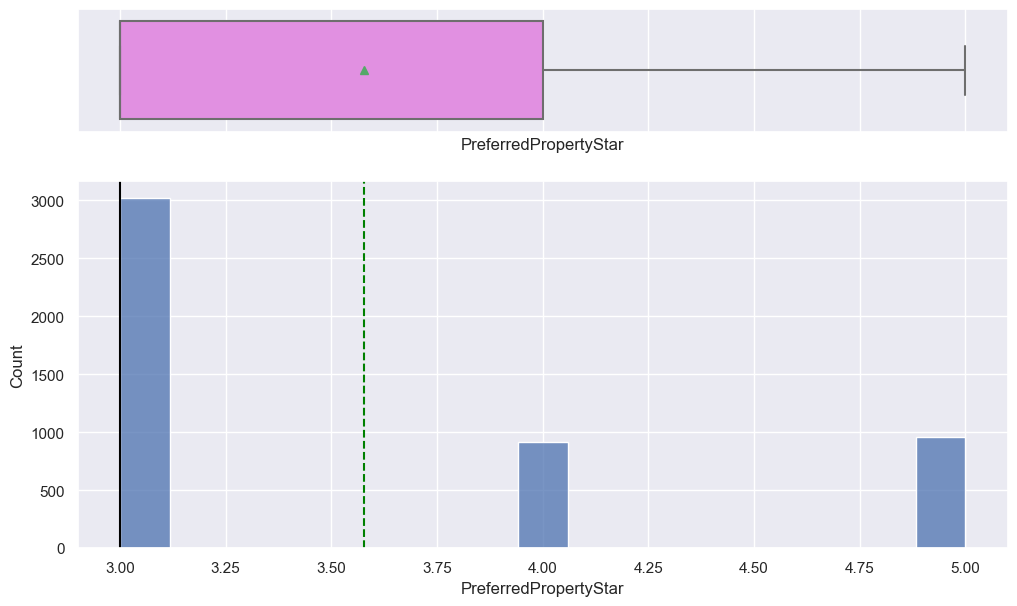

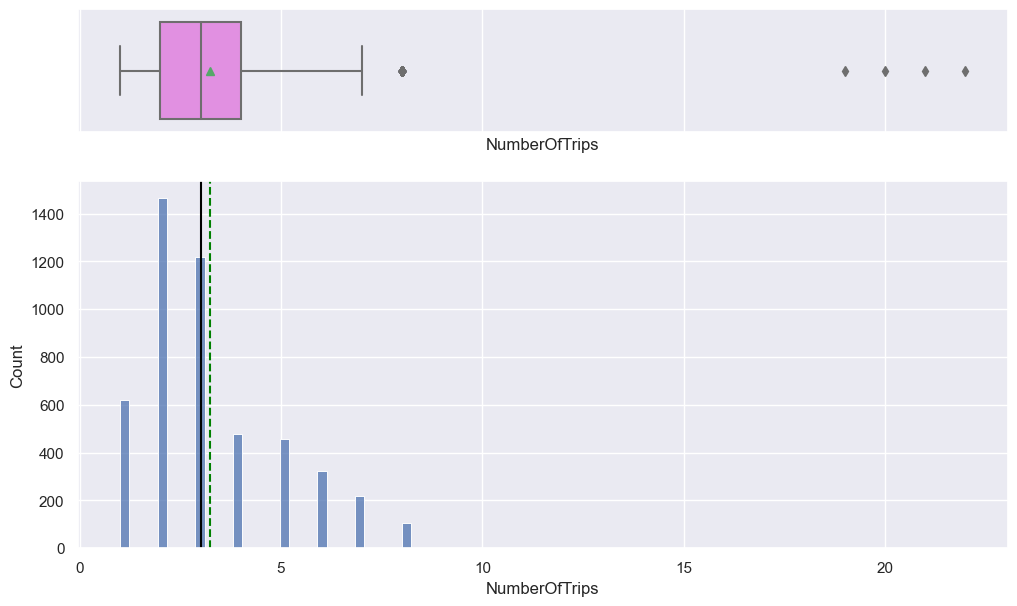

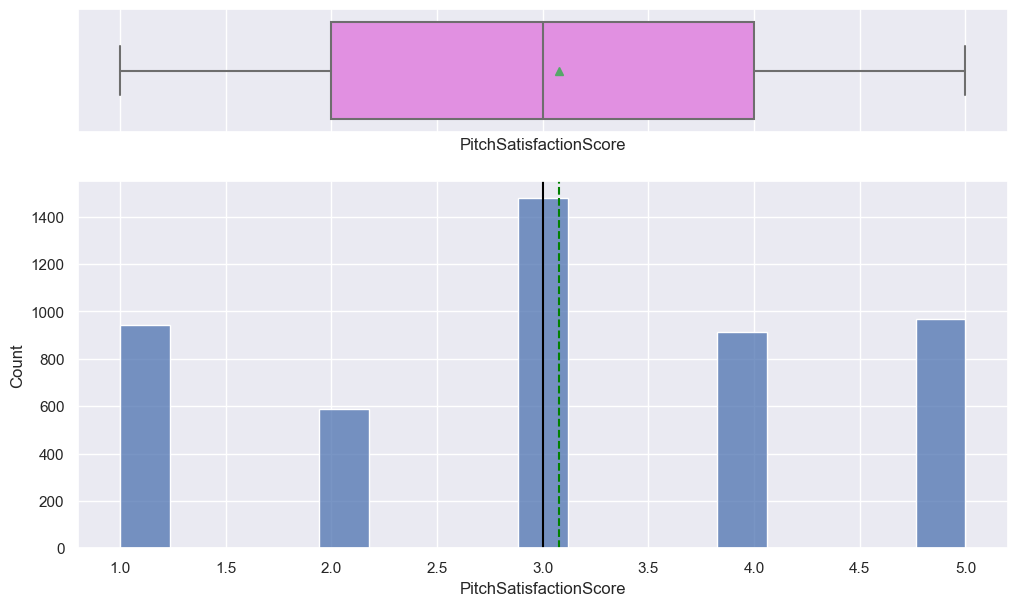

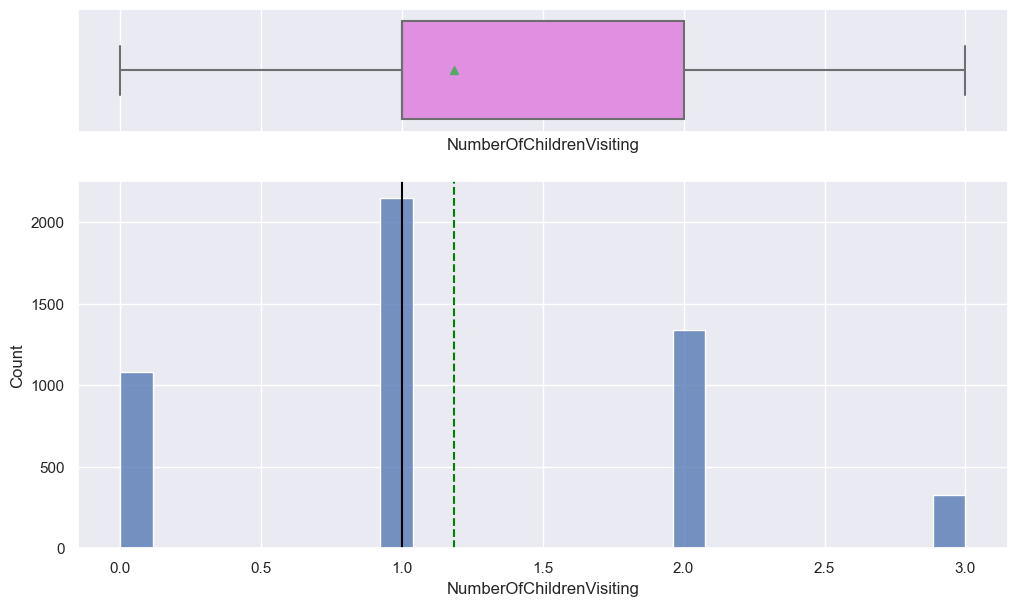

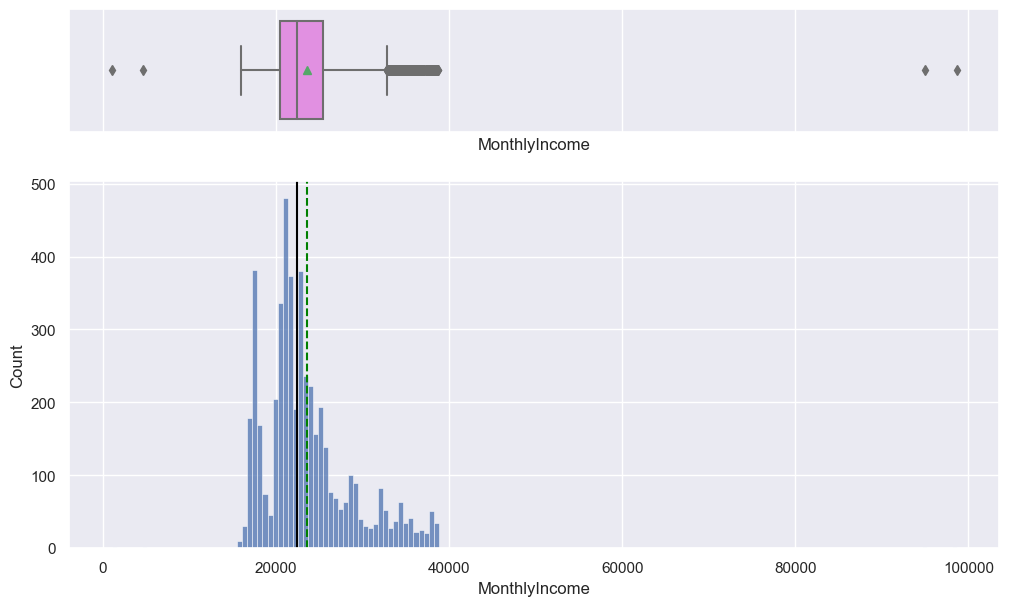

In [270]:
num_cols = data.select_dtypes(['float64','int64'])
for i in num_cols:
    histogram_boxplot(data,i)

* Age has no outliers and seems to be distributed quite close to normal.
* Most customers are from tier 1 cities, with almost none from tier 2
* Duration of Pitch is heavily right skewed, with some outliers around 120 mins.
* Preferred Property Star is right skewed as well
* Number of trips is very right skewed, most people take <8 trips with some outliers around 20
* Monthly Income is also right skewed, with some very large outliers as well as small outliers.

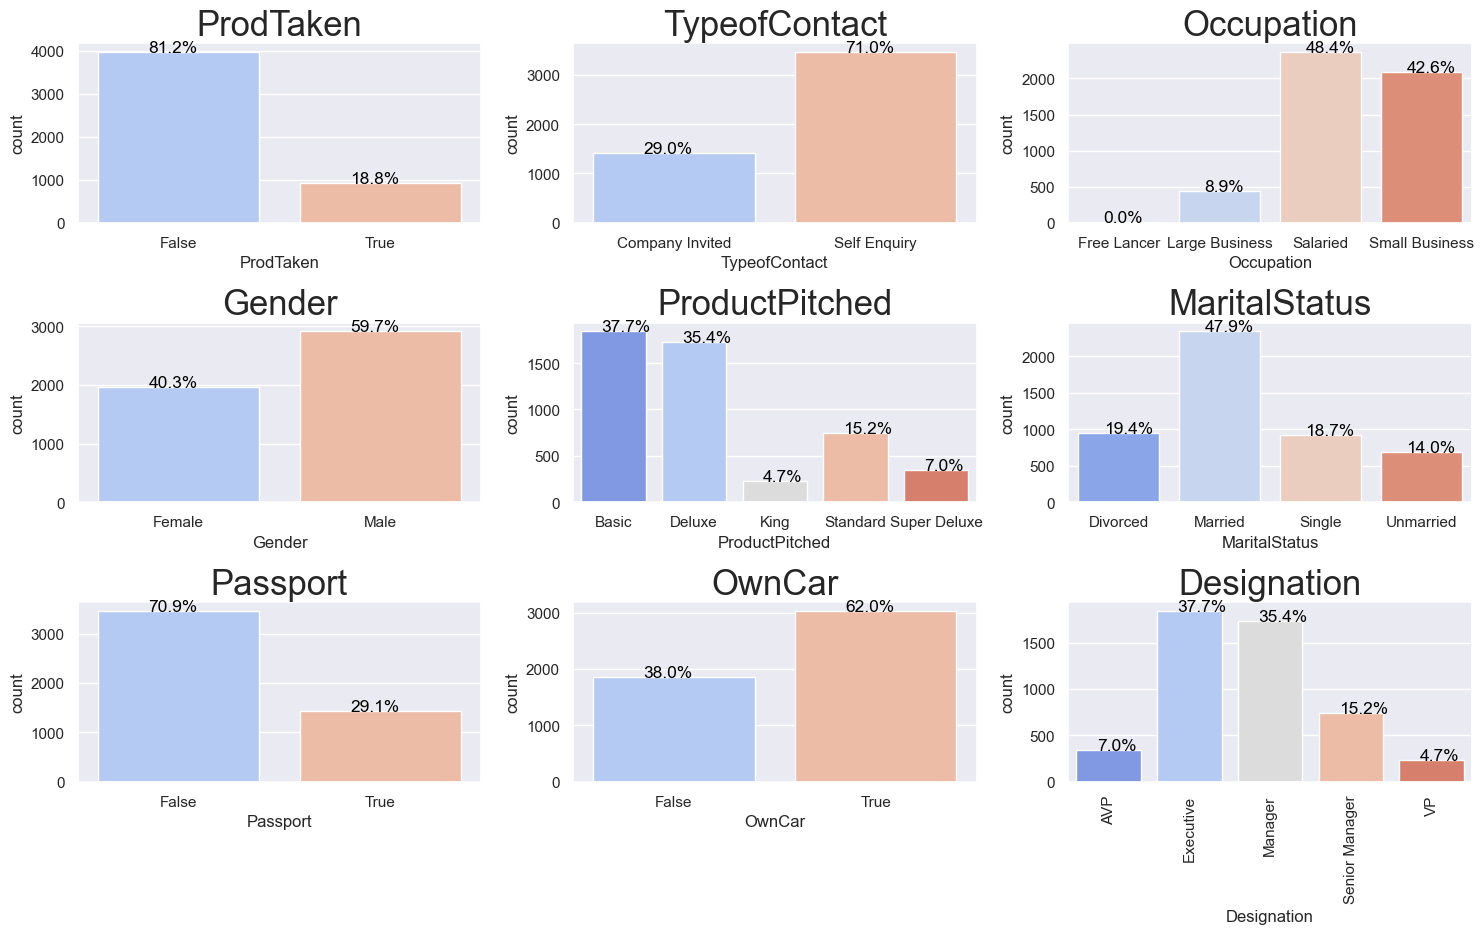

In [271]:
categorical_val = data.select_dtypes(exclude=np.number).columns.tolist() # get all categoral column names


plt.figure(figsize=(15,50))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    ax=sns.countplot(data[categorical_val[i]],palette='coolwarm')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (data[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.15  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12.5,color='black') # To annonate
plt.xticks(rotation=90)
plt.show()

* ProdTaken is the variable we need to predict, it is very imbalanced since only 18.8% of people took the product.
* TypeofContact is predominantly self enquiry, which means the makerting that the company is currently using is already quite effective. 
* Large majority of customers are either salaried or small business owners. This indicates a middle to lower high-class clientele.
* 60% of customers are male, this can be taken into consideration in marketing, perhaps advertise around valentine's day as gifting idea.
* In most cases the Basic and Deluxe products were pitched to customers
* A large amount of customers are married
* Surprisingly a large amount of customers don't have a passport
* The majority of customers own a car
* The majority of customers are either executives or managers, which fits in with the occupation data.

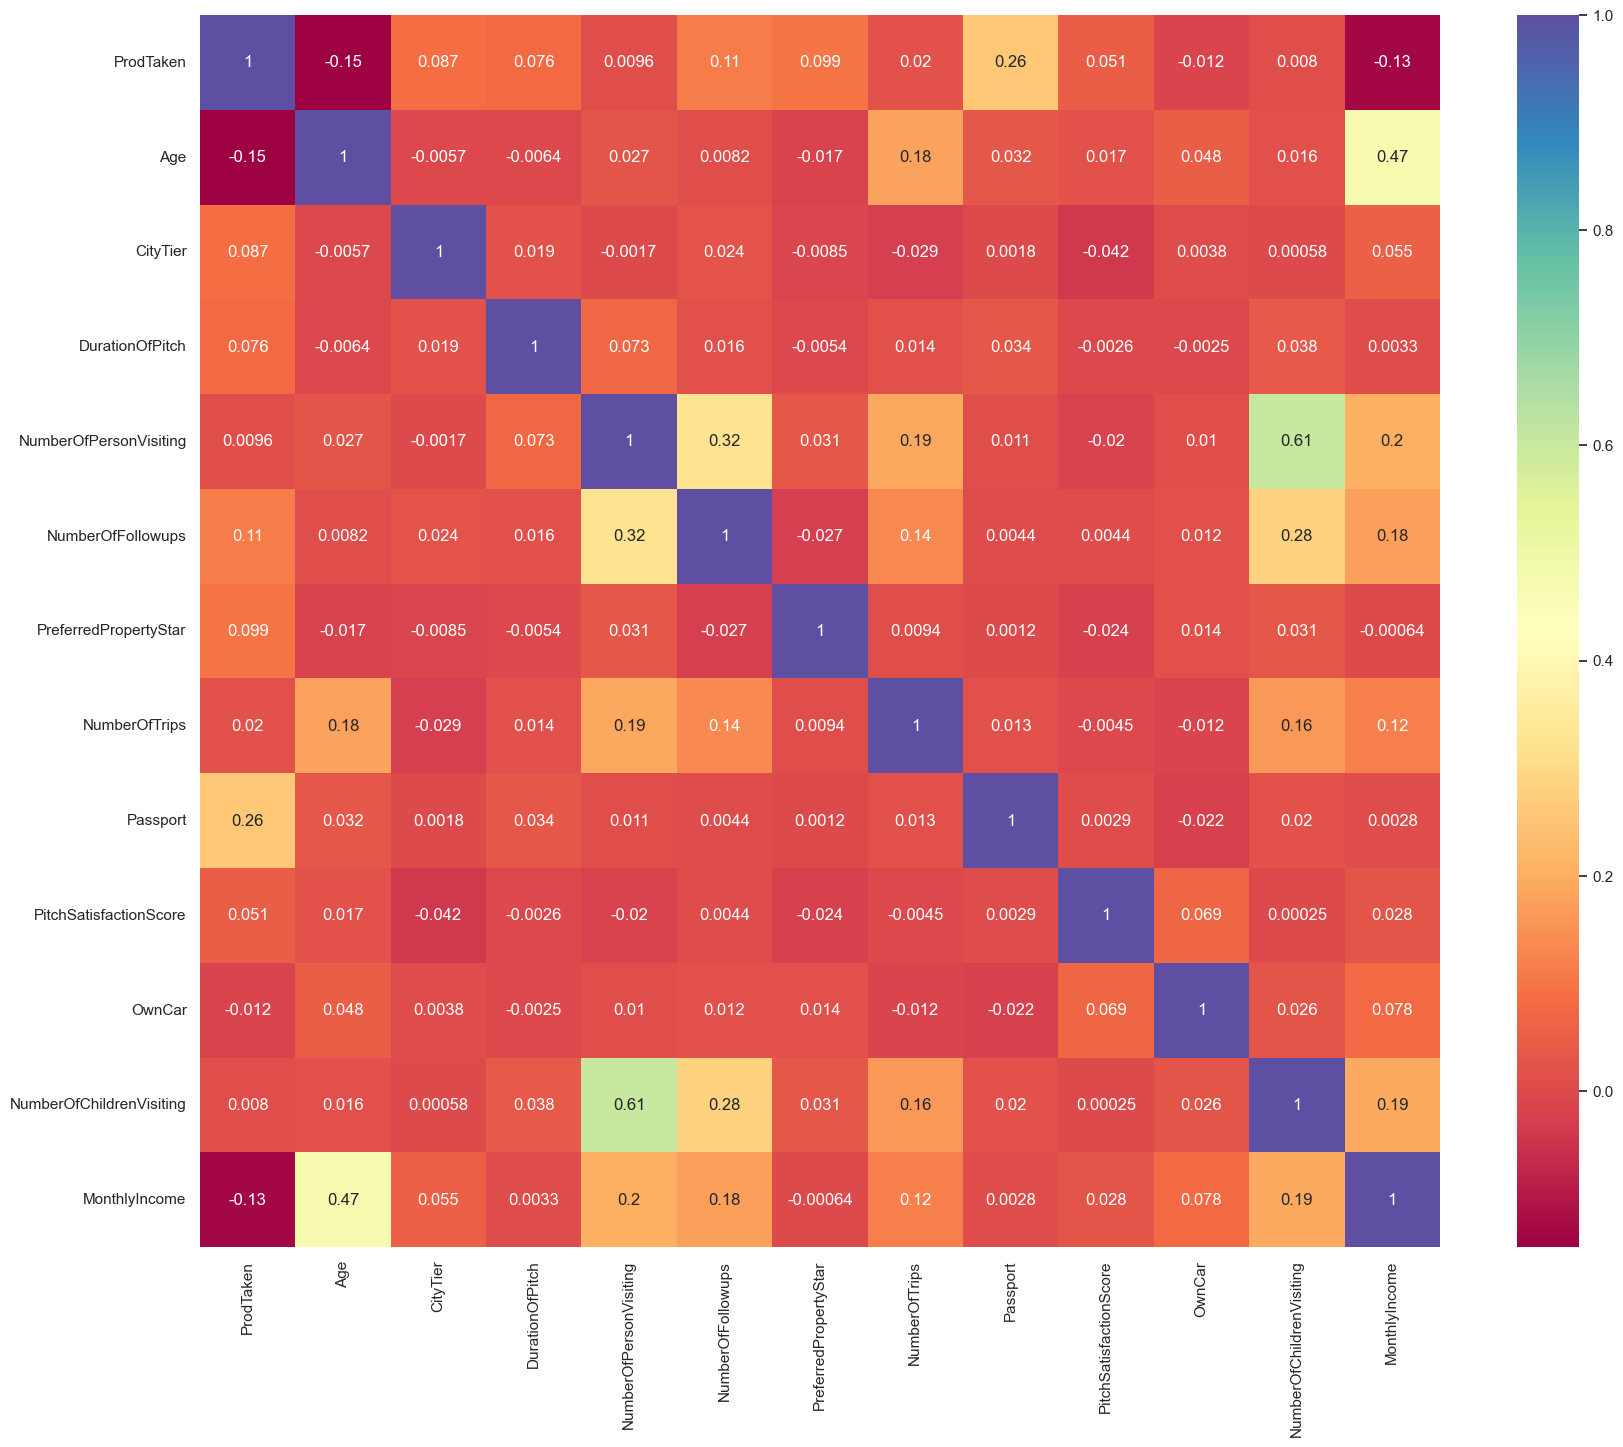

In [272]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(data.corr(),cmap='Spectral',annot=True)
plt.show()

* Most of the variables are not correlated.
* Customers who have a passport are slightly more likely to take a product package
* There were slightly more followup visits done with customers that had larger parties, meaning that customers who were bringing more children took longer to think about whether to purchase the product.

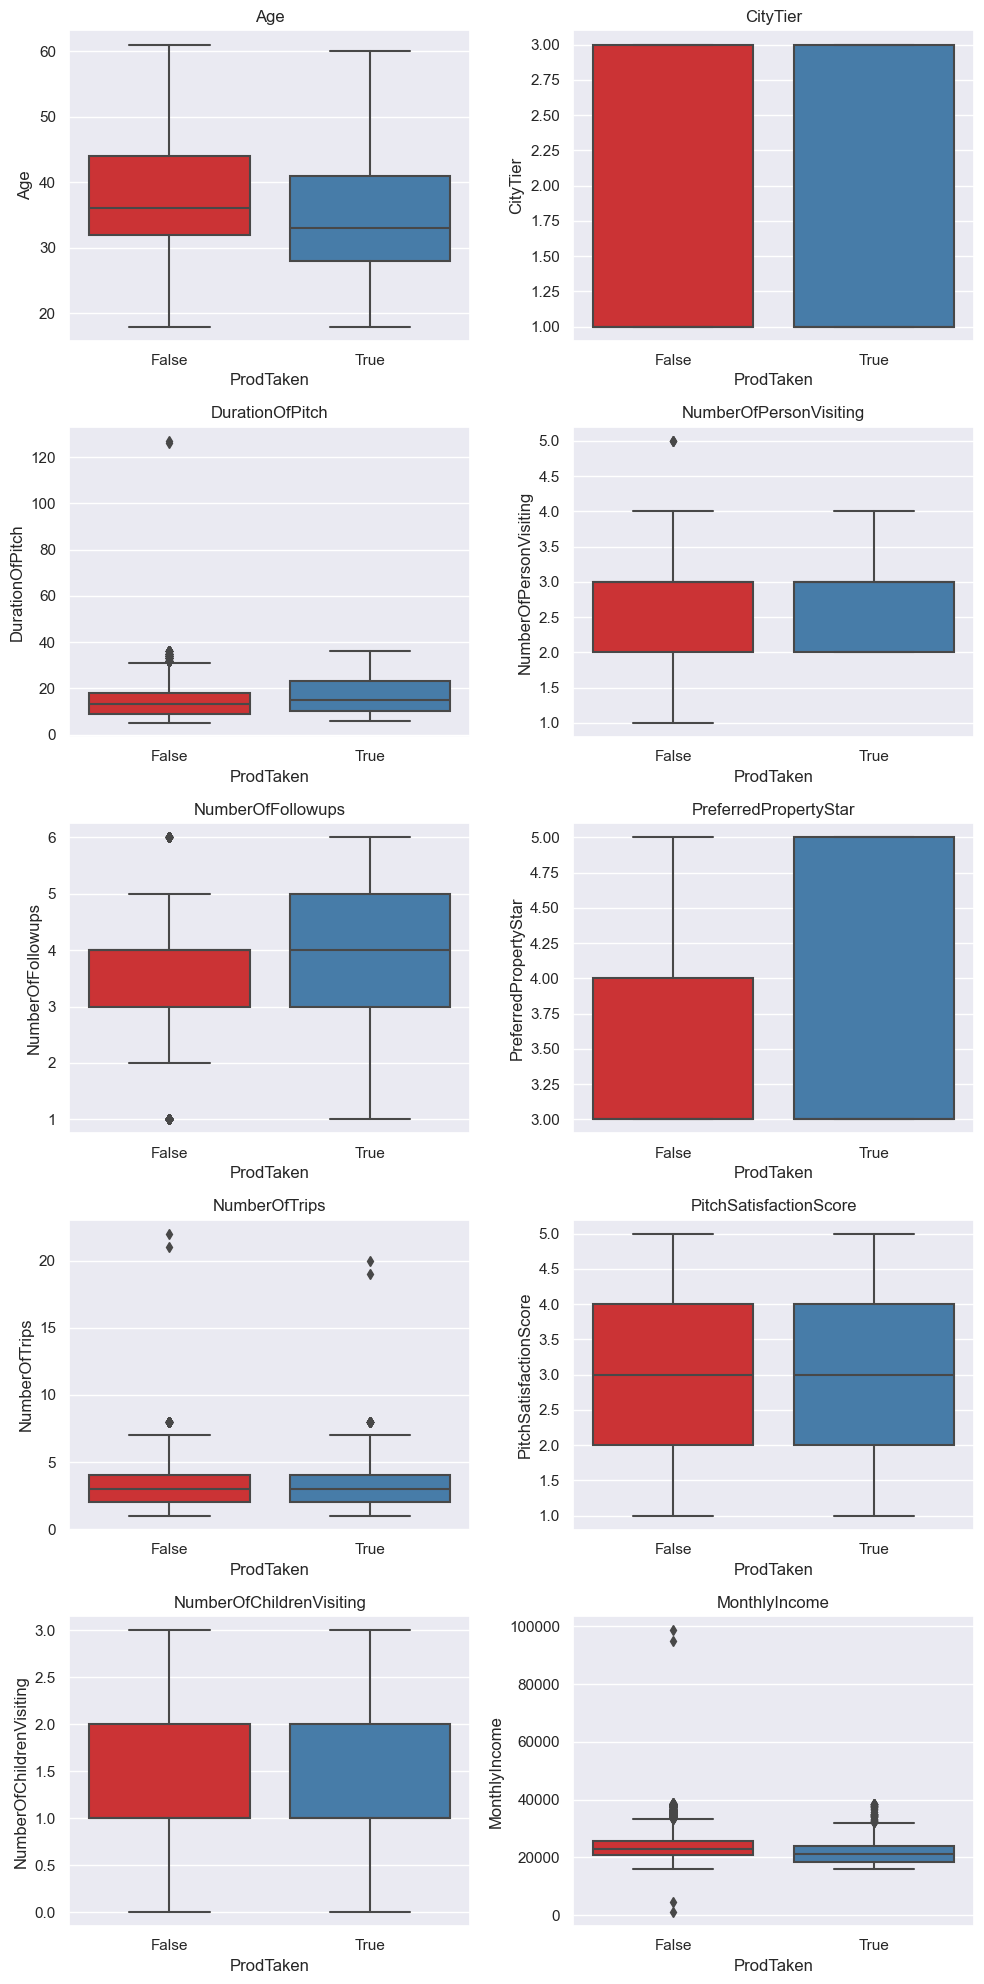

In [273]:
# For all numerical variables with Personal_Loan
Uni_num = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10,20))
for i, variable in enumerate(Uni_num):
                     plt.subplot(5,2,i+1)
                     sns.boxplot(data['ProdTaken'],data[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* The customers who didn't purchase a product were slightly older than ones who did. 
* Customers with a higher number of followups seemed to be more likely to buy a product
* Customers who bought a product preferred higher star properties
* All the outliers in duration of pitch resulted in customers who didn't purchase products. Pitches around the 20 min mark are the most effective seemingly.

In [274]:
#Stacked plot of categorical variables
def stacked_plot(x):
    sns.set(palette='Dark2')      
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [275]:
#Crosstab displaying the numbers between product taken or not taken vs the feature
def crosstab(x):
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*60)

In [276]:
#Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    crosstab(data[feature])        
        
    plt.show()  # show the plot

ProdTaken  False  True   All
CityTier                    
1           2670   520  3190
2            152    46   198
3           1146   354  1500
All         3968   920  4888
------------------------------------------------------------


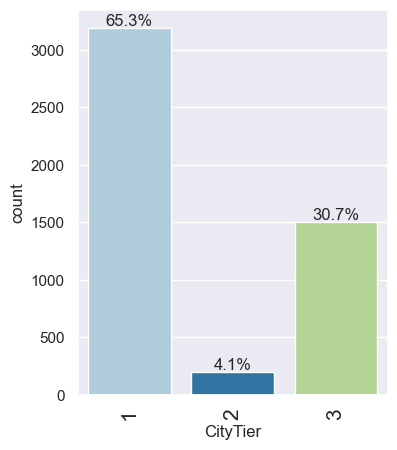

In [277]:
labeled_barplot(data, "CityTier",perc=True)

* Customers from City tiers 1 and 3 were most likely to buy packages

ProdTaken        False  True   All
TypeofContact                     
Company Invited   1109   310  1419
Self Enquiry      2859   610  3469
All               3968   920  4888
------------------------------------------------------------


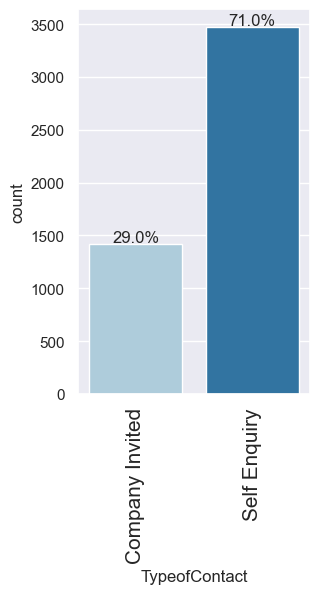

In [278]:
labeled_barplot(data, "TypeofContact",perc=True)

* More self Enquiry Customers bought products

ProdTaken       False  True   All
Occupation                       
Free Lancer         0     2     2
Large Business    314   120   434
Salaried         1954   414  2368
Small Business   1700   384  2084
All              3968   920  4888
------------------------------------------------------------


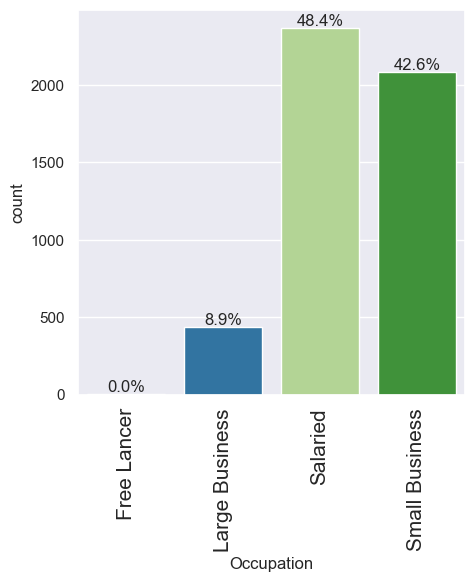

In [279]:
labeled_barplot(data, "Occupation",perc=True)

* Most customers who bough packages were salaried or small business owners, this may have to do with their income bracket. 
* There isn't enough data to make a conclusive determination about freelancers since the dataset only included 2. 

ProdTaken               False  True   All
NumberOfPersonVisiting                   
1                          39     0    39
2                        1151   267  1418
3                        1942   460  2402
4                         833   193  1026
5                           3     0     3
All                      3968   920  4888
------------------------------------------------------------


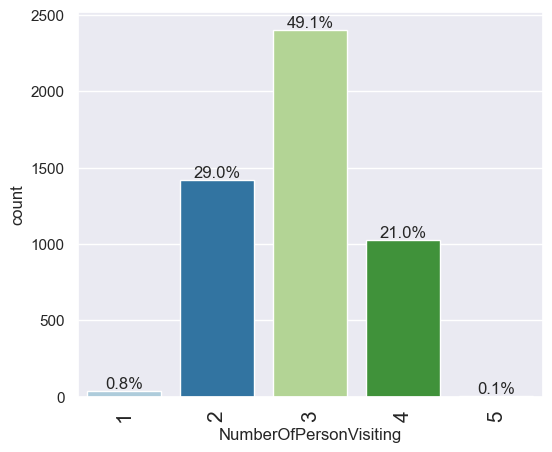

In [280]:
labeled_barplot(data, "NumberOfPersonVisiting",perc=True)

* Most customers broght 3 people. 
* Very few customers bought 1 or 5 people. 

ProdTaken       False  True   All
ProductPitched                   
Basic            1290   552  1842
Deluxe           1528   204  1732
King              210    20   230
Standard          618   124   742
Super Deluxe      322    20   342
All              3968   920  4888
------------------------------------------------------------


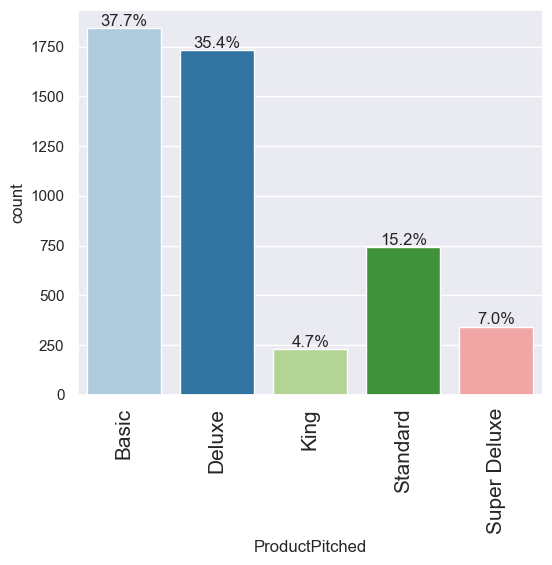

In [281]:
labeled_barplot(data, "ProductPitched",perc=True)

* The basic and deluxe packages are by far the most popular should should be a focus of marketing
* We should consider lowering the price of the king package to encourage upselling and keeping super deluxe as the highest end. 

ProdTaken              False  True   All
PreferredPropertyStar                   
3.0                     2531   488  3019
4.0                      731   182   913
5.0                      706   250   956
All                     3968   920  4888
------------------------------------------------------------


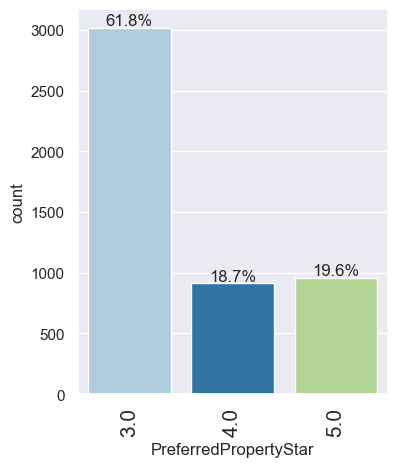

In [282]:
labeled_barplot(data, "PreferredPropertyStar",perc=True)

* The percentage of people actually buying products is much higher for the higher stars. Customers who indicate they desire a higher star rated property should be followed up with more often to get their business. 

ProdTaken      False  True   All
MaritalStatus                   
Divorced         826   124   950
Married         2014   326  2340
Single           612   304   916
Unmarried        516   166   682
All             3968   920  4888
------------------------------------------------------------


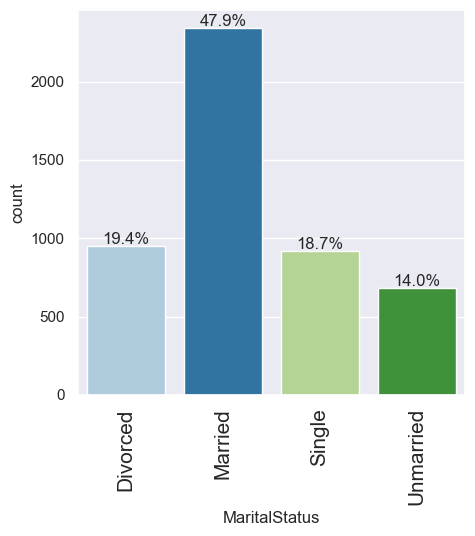

In [283]:
labeled_barplot(data, "MaritalStatus",perc=True)

* Most customers are married.
* 50% of single customers purchased a product
* A low fraction of divorcees purchased a product

ProdTaken  False  True   All
Passport                    
False       3040   426  3466
True         928   494  1422
All         3968   920  4888
------------------------------------------------------------


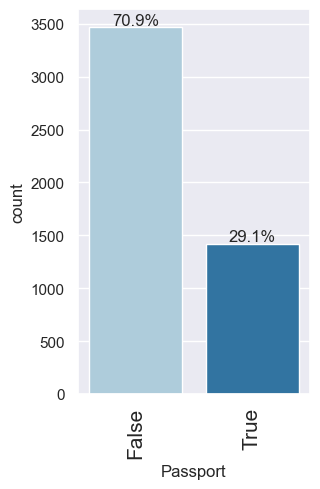

In [284]:
labeled_barplot(data, "Passport",perc=True)

* If customers have a passport they are much more likely to purchase products. 

ProdTaken               False  True   All
PitchSatisfactionScore                   
1                         798   144   942
2                         498    88   586
3                        1162   316  1478
4                         750   162   912
5                         760   210   970
All                      3968   920  4888
------------------------------------------------------------


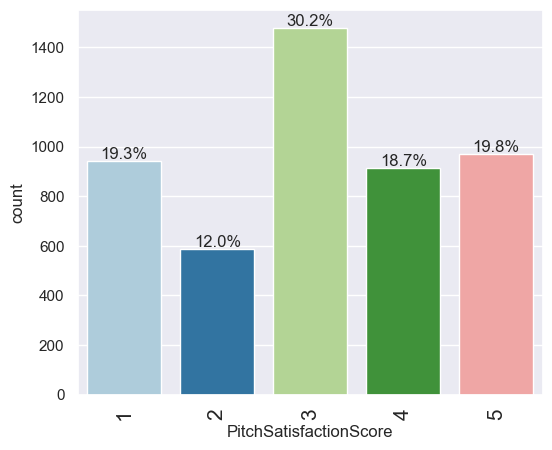

In [285]:
labeled_barplot(data, "PitchSatisfactionScore",perc=True)

* Based on the data a higher pitch satisfaction score doesn't indicate they are more lilely to purchase.

ProdTaken  False  True   All
OwnCar                      
False       1496   360  1856
True        2472   560  3032
All         3968   920  4888
------------------------------------------------------------


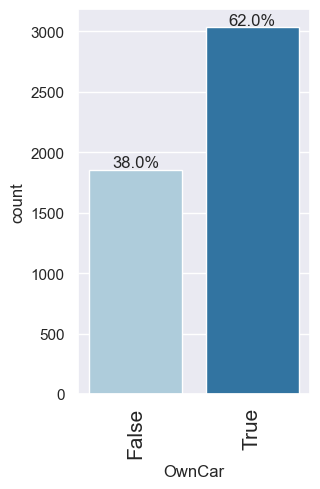

In [286]:
labeled_barplot(data, "OwnCar",perc=True)

* Most Customers owned a car

ProdTaken                 False  True   All
NumberOfChildrenVisiting                   
0.0                         880   202  1082
1.0                        1747   399  2146
2.0                        1082   253  1335
3.0                         259    66   325
All                        3968   920  4888
------------------------------------------------------------


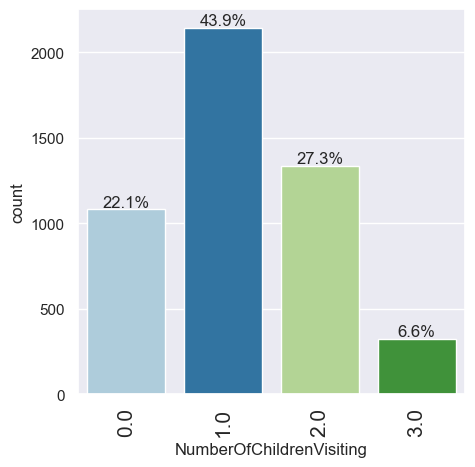

In [287]:
labeled_barplot(data, "NumberOfChildrenVisiting",perc=True)

* Most customers traveled with 1 child, whcih corresponds with the fact that most customers travel with three people, two parents and one child. 

ProdTaken       False  True   All
Designation                      
AVP               322    20   342
Executive        1290   552  1842
Manager          1528   204  1732
Senior Manager    618   124   742
VP                210    20   230
All              3968   920  4888
------------------------------------------------------------


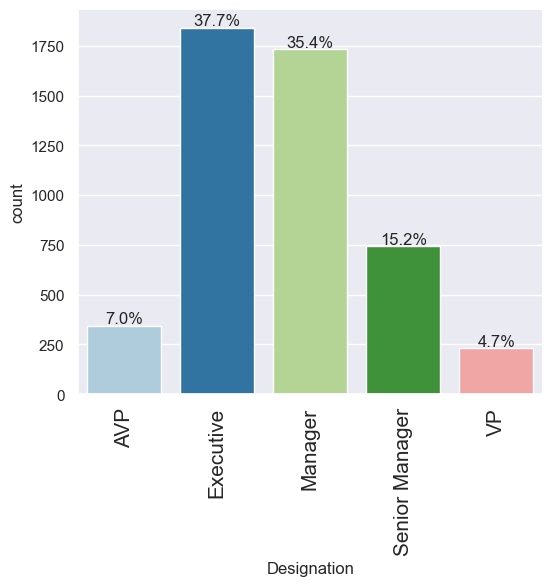

In [288]:
labeled_barplot(data, "Designation",perc=True)

* Most customers were exectives or managers

## Model Building

In [289]:
X= data.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y= data['ProdTaken']

In [290]:
X = pd.get_dummies(
    X,
    columns=['Occupation','TypeofContact','Gender','MaritalStatus','Designation'],
    drop_first=True,
)

In [291]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4888 non-null   float64
 1   CityTier                    4888 non-null   int64  
 2   NumberOfPersonVisiting      4888 non-null   int64  
 3   PreferredPropertyStar       4888 non-null   float64
 4   NumberOfTrips               4888 non-null   float64
 5   Passport                    4888 non-null   bool   
 6   OwnCar                      4888 non-null   bool   
 7   NumberOfChildrenVisiting    4888 non-null   float64
 8   MonthlyIncome               4888 non-null   float64
 9   Occupation_Large Business   4888 non-null   uint8  
 10  Occupation_Salaried         4888 non-null   uint8  
 11  Occupation_Small Business   4888 non-null   uint8  
 12  TypeofContact_Self Enquiry  4888 non-null   uint8  
 13  Gender_Male                 4888 

In [292]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [293]:
X_train.shape, X_test.shape

((3421, 21), (1467, 21))

In [294]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [295]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree 

In [296]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)
# Adding class weights due to the imbalance in the data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

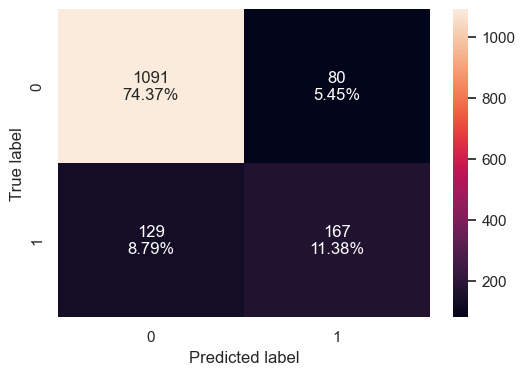

In [297]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [298]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.858   0.564      0.676 0.615


* The model has perfect metrics on training data, indicating overfitting
* The testing performance is quite low, with only 56.4% recall, of the total customers who actually took the package we only predicted a little higher than half.

## Tuning Decision Tree

In [299]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

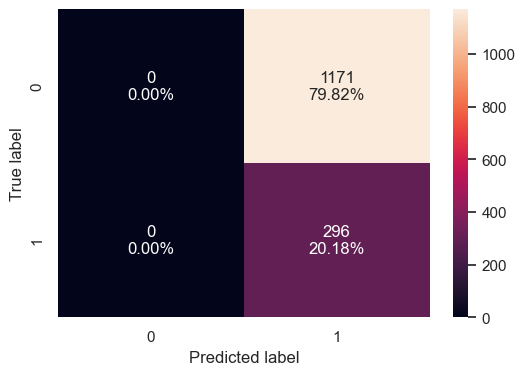

In [300]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [301]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.182   1.000      0.182 0.309
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.202   1.000      0.202 0.336


* The accuracy of the tuned model has fallen very drastically, the recall has however become pefect. 

## Bagging Classifier

In [302]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

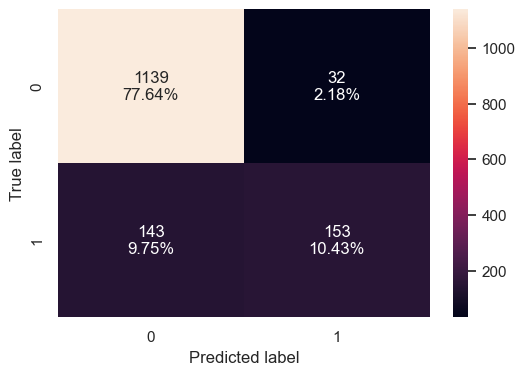

In [303]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [304]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.993   0.960      1.000 0.980
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.881   0.517      0.827 0.636


* This classifier doesn't seem to be overfitting the data to the same extent as the decision tree classifier.
* The recall on this model is worse than the decision tree, however precision is higher, resulting in a better f1 score.

## Tuning Bagging Classifier

In [305]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,10,15,50,100],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.13,
                                                                                 1: 0.87},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 10, 15, 50, 100]},
             scoring='recall')

In [306]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                      1: 0.87},
                                                        random_state=1),
                  max_features=1, n_estimators=100, random_state=1)

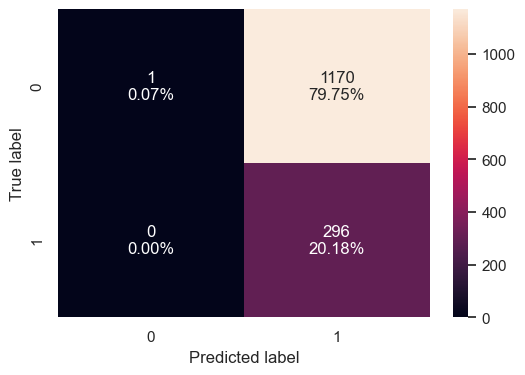

In [307]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)


In [308]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.184   1.000      0.183 0.309
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.202   1.000      0.202 0.336


* Tuning of the bagging classifier has resulted in a model that is very extremely good in recall, but incredibly imprecise. The f1 score for this model is really bad as a result.

## Random Forest

In [309]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

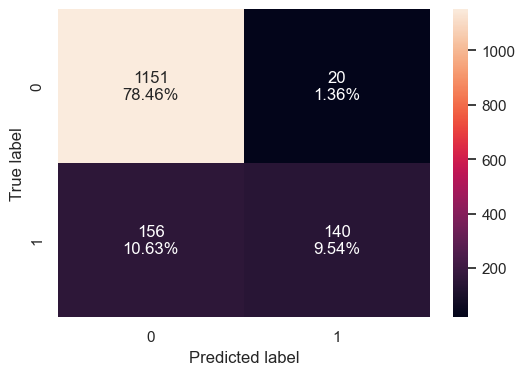

In [310]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [311]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.880   0.473      0.875 0.614


* This classifier performed worse in the recall section than the previous two.
* It would be benefitial to add class weights to tell the estimator to prioritize recall.

## Random Forest with Class Weights

In [312]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

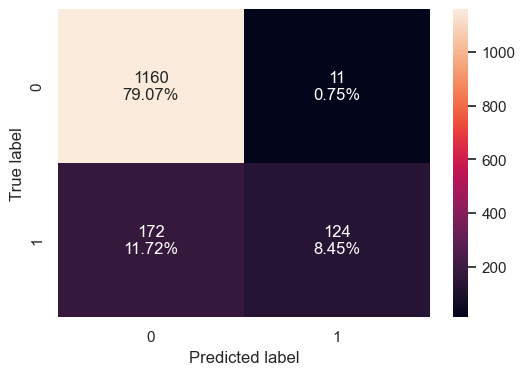

In [313]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [314]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.875   0.419      0.919 0.575


* Using class weights did not make any difference to the performance metrics

## Tuning Random Forest

In [315]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": [0.2, 0.7, 'log2','auto'],
    "max_samples": [0.3, 0.7, 0.1,None],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=5, n_estimators=150,
                       random_state=1)

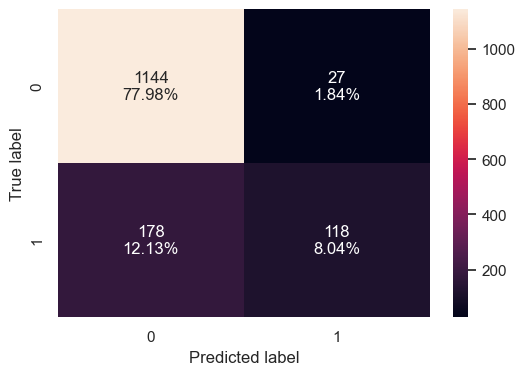

In [316]:
confusion_matrix_sklearn(rf_estimator_tuned, X_test,y_test)

In [317]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance \n",rf_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.880   0.473      0.875 0.614


* Tuning the random forest classifier didn't seem to change much, the accuracy went up a little bit but the recall has stayed the same. The precision fell by a bit.

## Gradient Boost

In [318]:
Grad_boost = GradientBoostingClassifier(random_state=1)
Grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

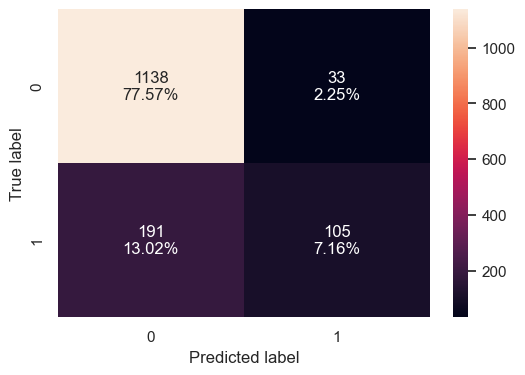

In [319]:
confusion_matrix_sklearn(Grad_boost, X_test,y_test)

In [320]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(Grad_boost, X_train,y_train)
print("Training performance \n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(Grad_boost, X_test,y_test)
print("Training performance \n",gb_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.882   0.431      0.849 0.572
Training performance 
    Accuracy  Recall  Precision    F1
0     0.847   0.355      0.761 0.484


* The model does well with the Accuracy metric, but not very well with recall.

## Gradient Boost Tuning

In [321]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,250,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.7)

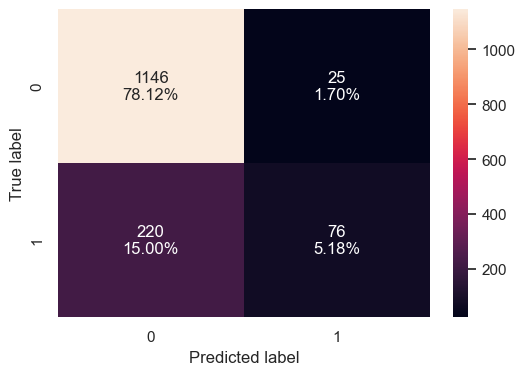

In [322]:
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

In [323]:
gb_tuned_classifier_model_train_perf = model_performance_classification_sklearn(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_classifier_model_train_perf)
gb_tuned_classifier_model_test_perf = model_performance_classification_sklearn(gb_tuned, X_test,y_test)
print("Training performance \n",gb_tuned_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.866   0.346      0.815 0.486
Training performance 
    Accuracy  Recall  Precision    F1
0     0.833   0.257      0.752 0.383


* Once again this model is not great for recall, but it does well on accuracy.

## ADA Boost

In [324]:
Ada_boost = AdaBoostClassifier(random_state=1)
Ada_boost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

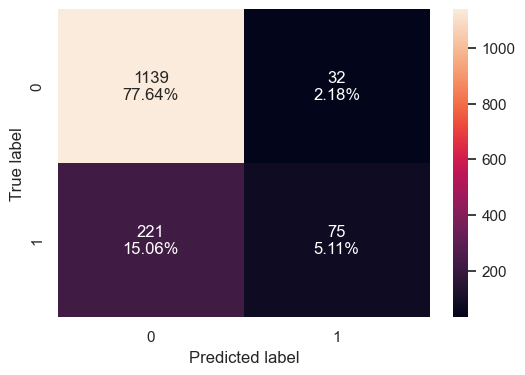

In [325]:
confusion_matrix_sklearn(Ada_boost, X_test,y_test)

In [326]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(Ada_boost, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(Ada_boost, X_test,y_test)
print("Training performance \n",ab_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.852   0.298      0.729 0.423
Training performance 
    Accuracy  Recall  Precision    F1
0     0.828   0.253      0.701 0.372


* This model also does well with accuracy but not recall.

## ADA Boost Tuning

In [327]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10, random_state=1)

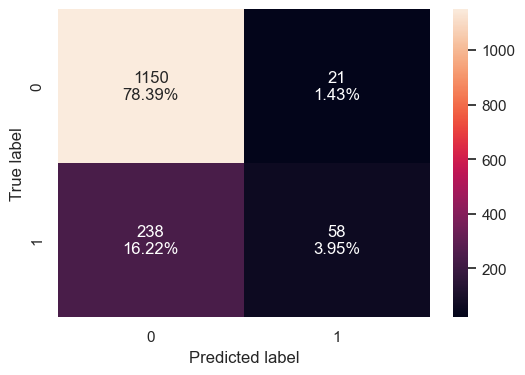

In [328]:
confusion_matrix_sklearn(ab_tuned, X_test,y_test)

In [329]:
ab_tuned_classifier_model_train_perf = model_performance_classification_sklearn(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_classifier_model_train_perf)
ab_tuned_classifier_model_test_perf = model_performance_classification_sklearn(ab_tuned, X_test,y_test)
print("Training performance \n",ab_tuned_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.842   0.208      0.734 0.325
Training performance 
    Accuracy  Recall  Precision    F1
0     0.823   0.196      0.734 0.309


* The hyperparameter tuning didn't seem to help the model's performance at all

## XG Boost

In [330]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

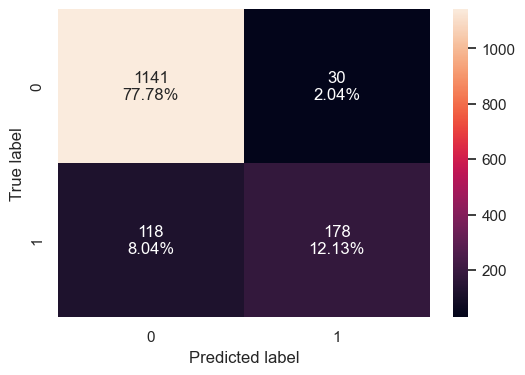

In [331]:
confusion_matrix_sklearn(xgb, X_test,y_test)

In [332]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb, X_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb, X_test,y_test)
print("Training performance \n",xgb_classifier_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.997   0.986      1.000 0.993
Training performance 
    Accuracy  Recall  Precision    F1
0     0.899   0.601      0.856 0.706


* This model has had the best performance compared to all of the other boosting classifiers
* There might be a slight amount of overfitting since the performance on the training set is much higher than on the testing set

## XG Boost Tuning

In [333]:
# Choose the type of classifier. 
xgb_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.6, n_estimators=90, random_state=1)

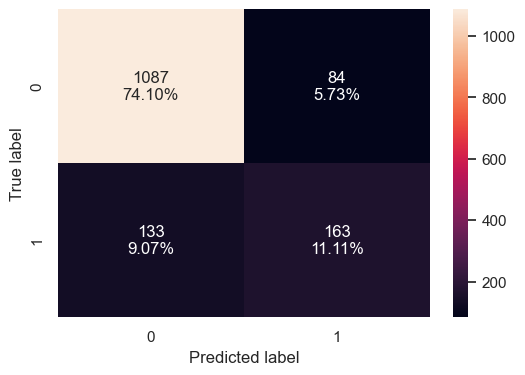

In [334]:
confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

In [335]:
xgb_classifier_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train,y_train)
print("Training performance \n",xgb_classifier_tuned_model_train_perf)
xgb_classifier_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test,y_test)
print("Training performance \n",xgb_classifier_tuned_model_test_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.965   0.870      0.933 0.900
Training performance 
    Accuracy  Recall  Precision    F1
0     0.852   0.551      0.660 0.600


## Model Comparison

In [336]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, bagging_model_train_perf.T, bagging_estimator_model_train_perf.T, rf_model_train_perf.T, rf_wt_model_train_perf.T, rf_tuned_model_train_perf.T, gb_classifier_model_train_perf.T, gb_tuned_classifier_model_train_perf.T, ab_classifier_model_train_perf.T, ab_tuned_classifier_model_train_perf.T, xgb_classifier_model_train_perf.T, xgb_classifier_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Model",
    "Bagging Model Tuned",
    "Random Forest",
    "Random Forest Class Weights",
    "Random Forest Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "ADA Boosting",
    "ADA Boost Tuned",
    "XG Boost",
    "XG Boost Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Model,Bagging Model Tuned,Random Forest,Random Forest Class Weights,Random Forest Tuned,Gradient Boost,Gradient Boost Tuned,ADA Boosting,ADA Boost Tuned,XG Boost,XG Boost Tuned
Accuracy,1.000,0.182,0.993,0.184,1.000,1.000,0.925,0.882,0.866,0.852,0.842,0.997,0.965
Recall,1.000,1.000,0.960,1.000,1.000,1.000,0.627,0.431,0.346,0.298,0.208,0.986,0.870
Precision,1.000,0.182,1.000,0.183,1.000,1.000,0.944,0.849,0.815,0.729,0.734,1.000,0.933
F1,1.000,0.309,0.980,0.309,1.000,1.000,0.753,0.572,0.486,0.423,0.325,0.993,0.900


In [337]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, bagging_model_test_perf.T, bagging_estimator_model_test_perf.T, rf_model_test_perf.T, rf_wt_model_test_perf.T, rf_tuned_model_test_perf.T, gb_classifier_model_test_perf.T, gb_tuned_classifier_model_test_perf.T, ab_classifier_model_test_perf.T, ab_tuned_classifier_model_test_perf.T, xgb_classifier_model_test_perf.T, xgb_classifier_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Model",
    "Bagging Model Tuned",
    "Random Forest",
    "Random Forest Class Weights",
    "Random Forest Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "ADA Boosting",
    "ADA Boost Tuned",
    "XG Boost",
    "XG Boost Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Model,Bagging Model Tuned,Random Forest,Random Forest Class Weights,Random Forest Tuned,Gradient Boost,Gradient Boost Tuned,ADA Boosting,ADA Boost Tuned,XG Boost,XG Boost Tuned
Accuracy,0.858,0.202,0.881,0.202,0.880,0.875,0.860,0.847,0.833,0.828,0.823,0.899,0.852
Recall,0.564,1.000,0.517,1.000,0.473,0.419,0.399,0.355,0.257,0.253,0.196,0.601,0.551
Precision,0.676,0.202,0.827,0.202,0.875,0.919,0.814,0.761,0.752,0.701,0.734,0.856,0.660
F1,0.615,0.336,0.636,0.336,0.614,0.575,0.535,0.484,0.383,0.372,0.309,0.706,0.600


## Conclusion: 
* Based on our results we can conclude that the XG Boost was the best classifier to fit our data. While it may be slightly overfitting the training data it still has the highest F1 score of all the models on the test data. 

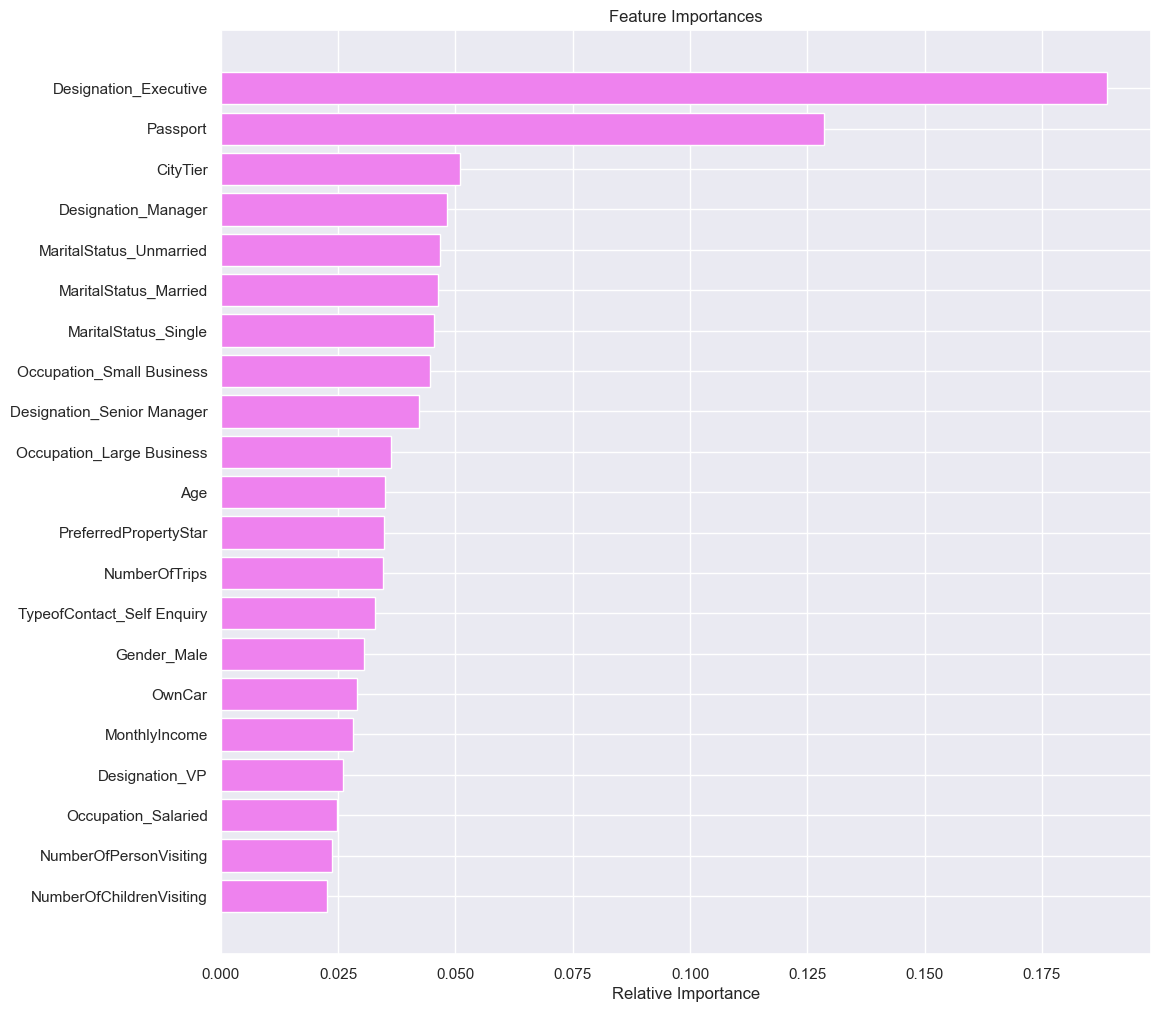

In [338]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* For the XG Boost Classifier the most important features were if the customers were designated as executives and if the customer has a passport. 

## Recommendations:
* Based on the fact that our model singled out the executive designation as so important, I think that there should be marketing targeted specifically towards people who fit this demographic. 
    * One avenue of marketing could be towards companies that are looking to purchase travel products for their executive employees, for example company retreats. 
* Since basic and deluxe are the most popular packages, the other packages could possibly be changed to have features similar to those, or the packages could be rearranged slightly to promote upselling. 
    * the king package should be lowered in price slightly to encourage more customers to upgrade to it over deluxe since there is a huge dropoff between deluxe and king. 
* The two least important variables were number of people visiting and number of children visiting. If there is an upgrade fee for adding more tickets that could be replaced with a slightly higher cost package with the extra tickets built in and marketed as a feature since customers are not likely to purchase upgrades anyway. 
    * From the analysis we also saw that customers were least likely to take 1 person or 5 people on the trips. Therefore upgrades to 5 people or down to just one person should be the most expensive. 
* It seems like the marketing is not reaching married couples of families as much since the largest proportion of customers are single. Marketing should target families or couples, for example by running a valentine's day deal. 
* Customers who prefer higher star rated properties are more likely to actually purchase products, they should be followed up with more. 
* One key missing data point is if the pitch was successful in getting the customer to buy the product, or if they bought the same product they were pitched. This data may help analytics. 
* I would suggest building the wellness tourism package similarly to the basic and deluxe packages, since those seem to be the most popular. 
* We should also be collecting customer reviews since those can be important for analytics data. 
* Duration of Pitch should be kept to about 20 mins since that is the most effective, long pitches are not effective and should be discouraged. 
* Since a higher fraction of customers who had passports bought products, the marketing team should ask if the customer has a passport early on, and if they don't they should be a lower priority customer. 
